In [162]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie danych

In [163]:
dane=pd.read_csv('Wholesale customers data.csv')
print(dane)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [164]:
df= pd.DataFrame(dane)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


1. Sprawdzenie kompletności danych.

In [165]:
dane.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

2. Usunięcie kolumny Channel i Region.

In [166]:
df = df.drop("Channel", axis=1)

In [167]:
df = df.drop("Region", axis=1)

3. Wizualizacja danych surowych

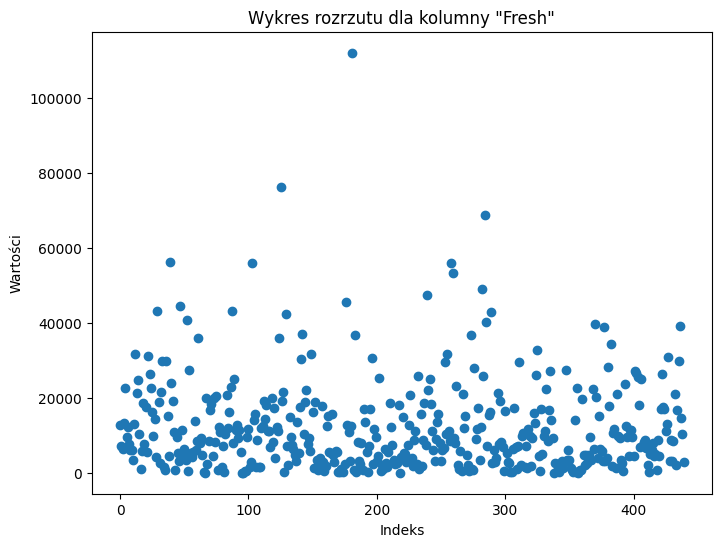

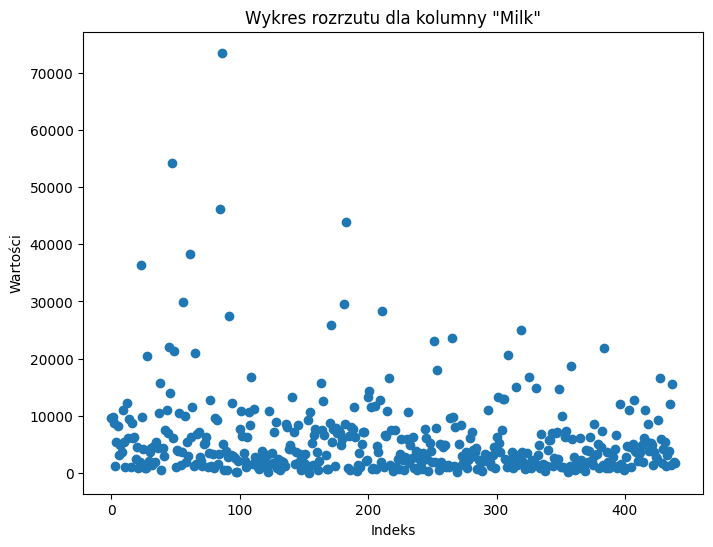

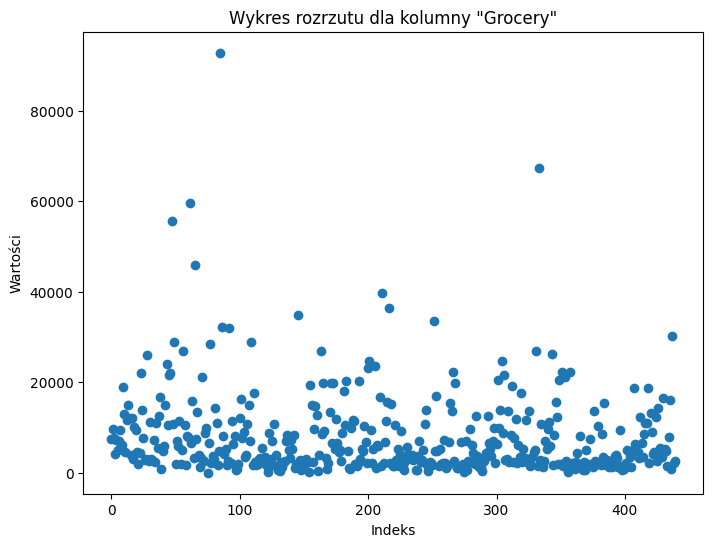

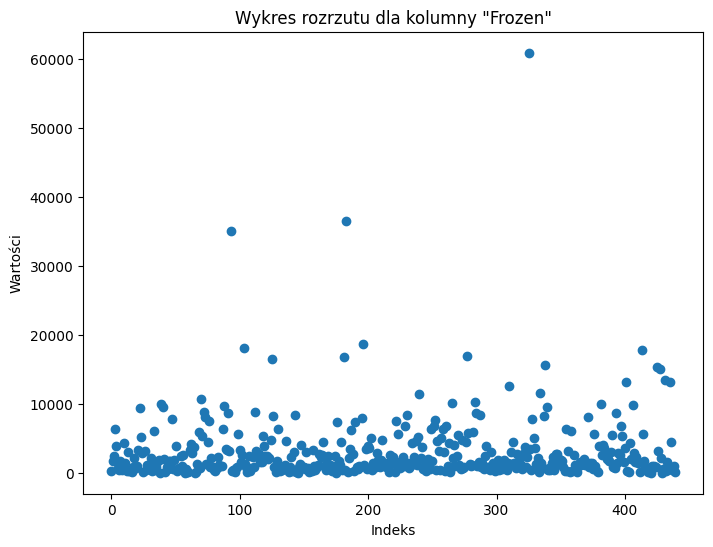

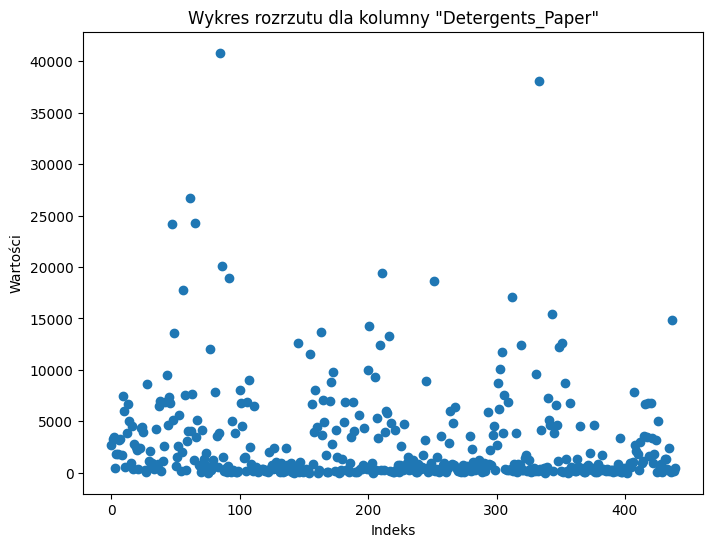

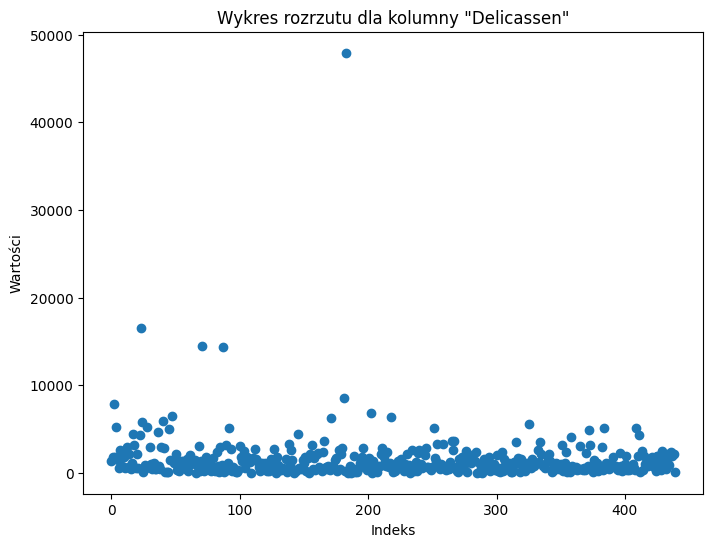

In [168]:
for kolumna in df.columns:
    plt.figure(figsize=(8, 6))  
    plt.scatter(df.index, df[kolumna])
    plt.title(f'Wykres rozrzutu dla kolumny "{kolumna}"')
    plt.xlabel('Indeks')
    plt.ylabel('Wartości')
    plt.show()

Text(0, 0.5, 'Wartość')

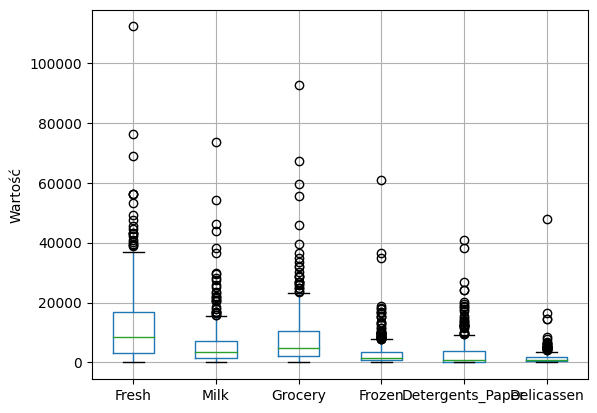

In [169]:
df.boxplot()
plt.ylabel('Wartość')

4. Przeprowadzenie normalizacji w zakresie [0,1] na kolumnach.

In [170]:

df_normalizacja= pd.DataFrame(df)

for kolumna in df_normalizacja.columns:
    x = df_normalizacja[kolumna]
    xmin = x.min()
    xmax = x.max()
    df_normalizacja[kolumna] = ((x - xmin) / (xmax - xmin)) * (1 - 0) + 0

print(df_normalizacja)
print(df_normalizacja.describe())

df_normalizacja.to_csv('df_normalizacja_0_1.csv', index=False) 


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1    0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2    0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3    0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4    0.201626  0.072914  0.077552  0.063934          0.043455    0.108093
..        ...       ...       ...       ...               ...         ...
435  0.264829  0.163338  0.172715  0.215469          0.004385    0.045912
436  0.349761  0.018736  0.008202  0.073713          0.002205    0.048874
437  0.129543  0.210136  0.325943  0.006771          0.363463    0.038882
438  0.091727  0.026224  0.024025  0.016649          0.004042    0.044264
439  0.024824  0.022371  0.027022  0.000657          0.011611    0.001022

[440 rows x 6 columns]
            Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.00

5. Przeprowadzenie normalizacji w zakresie [-1,1] na kolumnach.

In [171]:
df_normalizacja1= pd.DataFrame(df)

for kolumna in df_normalizacja1.columns:
    x = df_normalizacja1[kolumna]
    xmin = x.min()
    xmax = x.max()
    df_normalizacja1[kolumna] = ((x - xmin) / (xmax - xmin) )* (1 -(-1)) + (-1)


print(df_normalizacja1)
print(df_normalizacja1.describe())

df_normalizacja1.to_csv('df_normalizacja_-1_1.csv', index=False)  


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   -0.774120 -0.738546 -0.837072 -0.993787         -0.869146   -0.944305
1   -0.874202 -0.734352 -0.793807 -0.942903         -0.838820   -0.926033
2   -0.886757 -0.761638 -0.834420 -0.921767         -0.827895   -0.672883
3   -0.763491 -0.968928 -0.909072 -0.790316         -0.975309   -0.925532
4   -0.596747 -0.854173 -0.844897 -0.872132         -0.913090   -0.783813
..        ...       ...       ...       ...               ...         ...
435 -0.470343 -0.673325 -0.654570 -0.569062         -0.991231   -0.908177
436 -0.300478 -0.962529 -0.983595 -0.852574         -0.995591   -0.902253
437 -0.740914 -0.579728 -0.348114 -0.986457         -0.273075   -0.922236
438 -0.816546 -0.947551 -0.951949 -0.966702         -0.991917   -0.911473
439 -0.950351 -0.955258 -0.945956 -0.998685         -0.976778   -0.997956

[440 rows x 6 columns]
            Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.00

6. Przeprowadzenie standaryzacji danych na kolumnach

In [172]:
df_standaryzacja= pd.DataFrame(df)

df_standaryzacja = (df_standaryzacja - df_standaryzacja.mean()) / df_standaryzacja.std()

print(df_standaryzacja)
print(df_standaryzacja.describe())

df_standaryzacja.to_csv('df_standaryzacja.csv', index=False) 


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.052873  0.522972 -0.041068 -0.588697         -0.043519   -0.066264
1   -0.390857  0.543839  0.170125 -0.269829          0.086309    0.089050
2   -0.446521  0.408073 -0.028125 -0.137379          0.133080    2.240742
3    0.099998 -0.623310 -0.392530  0.686363         -0.498021    0.093305
4    0.839284 -0.052337 -0.079266  0.173661         -0.231654    1.297870
..        ...       ...       ...       ...               ...         ...
435  1.399719  0.847482  0.849793  2.072862         -0.566186    0.240817
436  2.152842 -0.591469 -0.756304  0.296223         -0.584853    0.291170
437  0.200098  1.313176  2.345716 -0.542762          2.508362    0.121318
438 -0.135230 -0.516947 -0.601829 -0.418964         -0.569122    0.212804
439 -0.728478 -0.555292 -0.572575 -0.619389         -0.504313   -0.522275

[440 rows x 6 columns]
              Fresh        Milk       Grocery        Frozen  Detergents_Paper  \
count  

7. Wizualizacja normalizacji [0,1], [-1,1] oraz standaryzacji na wybranych kolumnach.


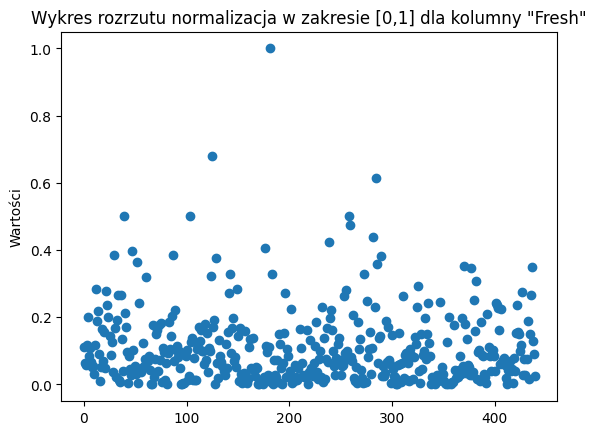

In [177]:
plt.scatter(df_normalizacja.index, df_normalizacja['Fresh']) 
plt.title('Wykres rozrzutu normalizacja w zakresie [0,1] dla kolumny "Fresh"')
plt.xlabel
plt.ylabel('Wartości')
plt.show()

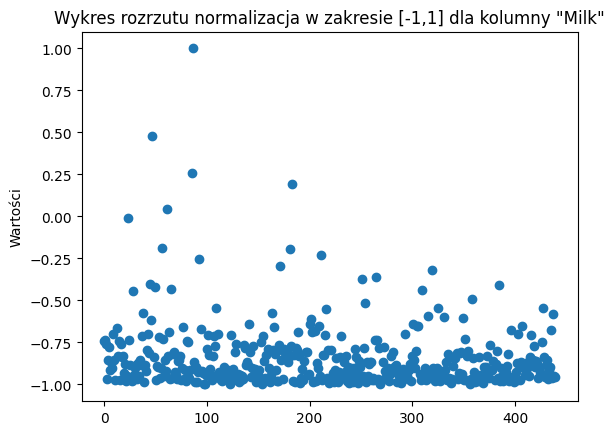

In [178]:
plt.scatter(df_normalizacja1.index, df_normalizacja1['Milk']) 
plt.title('Wykres rozrzutu normalizacja w zakresie [-1,1] dla kolumny "Milk"')
plt.xlabel
plt.ylabel('Wartości')
plt.show()

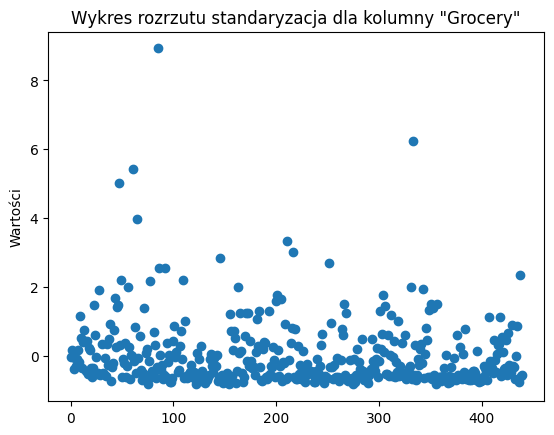

In [179]:
plt.scatter(df_standaryzacja.index, df_standaryzacja['Grocery']) 
plt.title('Wykres rozrzutu standaryzacja dla kolumny "Grocery"')
plt.xlabel
plt.ylabel('Wartości')
plt.show()